In [1]:
import numpy as np
import pandas as pd

# Importar os dados
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
print(f"Base de dados com {len(df)} linhas")

Base de dados com 150 linhas


In [2]:
# Alterando dados categóricos para numéricos
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df['variety']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [3]:
# Principio do Aprendizado de Maquina Supervisionado
data = df.drop('variety', axis=1) # Dados
labels = df['variety'] # Labels

In [4]:
# Convertendo para array
data = data.values
labels = labels.values

In [5]:
# Dividindo dados para o processo de treino, teste e validação
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=41)
print(f'Quantidade de Dados para Treinamento : {len(data_train)}')
print(f'Quantidade de Dados para Teste : {len(data_test)}')

Quantidade de Dados para Treinamento : 120
Quantidade de Dados para Teste : 30


In [6]:
import torch
data_train = torch.FloatTensor(data_train)
data_test = torch.FloatTensor(data_test)
labels_train = torch.LongTensor(labels_train)
labels_test = torch.LongTensor(labels_test)

In [7]:
# Importação das Bibliotecas 
import torch.nn as nn

# Criação do Modelo de Rede
    # 4 Entradas (4 Caracteristicas da Flor)
    # 2 Camadas de Neuronio
    # 3 Saidas (3 Rotulos de Flor)
class IrisClassifier(nn.Module) :
    def __init__(self, input_size = 4, hidden_size1=128, hidden_size2 = 64, output_size = 3) :
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, data) :
        data = self.relu(self.fc1(data))
        data = self.relu(self.fc2(data))
        data = self.output(data)
        return data


In [8]:
classificadorMonstro = IrisClassifier() 

In [9]:
# Otimizador e Função de calculo de erro
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classificadorMonstro.parameters(), lr=learning_rate)

In [10]:
def train_network(model, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses) :
    for i in range(num_epochs) :
        optimizer.zero_grad()

        label_train = model.forward(data_train) # Pegando a previsão
        loss_train = criterion(label_train, labels_train)
        loss_train.backward()
        optimizer.step()
        
        label_test = model(data_test)
        loss_test = criterion(label_test, labels_test)
        
        train_losses.append(loss_train.detach().numpy())
        test_losses.append(loss_test.detach().numpy())

        if i%10 == 0 :
            print(f'Época {i}, Erro de Treinamento : {loss_train}, Erro de Teste : {loss_test}')


In [11]:
num_epochs = 100
train_losses = []
test_losses = []

In [12]:
train_network(classificadorMonstro, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses)

Época 0, Erro de Treinamento : 1.1526353359222412, Erro de Teste : 1.1457393169403076
Época 10, Erro de Treinamento : 0.3286384046077728, Erro de Teste : 0.32155364751815796
Época 20, Erro de Treinamento : 0.14023981988430023, Erro de Teste : 0.17696483433246613
Época 30, Erro de Treinamento : 0.06705626100301743, Erro de Teste : 0.15418852865695953
Época 40, Erro de Treinamento : 0.048117101192474365, Erro de Teste : 0.15765850245952606
Época 50, Erro de Treinamento : 0.03653828054666519, Erro de Teste : 0.16752611100673676
Época 60, Erro de Treinamento : 0.03104373812675476, Erro de Teste : 0.1732298731803894
Época 70, Erro de Treinamento : 0.026969095692038536, Erro de Teste : 0.1799662709236145
Época 80, Erro de Treinamento : 0.024132506921887398, Erro de Teste : 0.18598270416259766
Época 90, Erro de Treinamento : 0.021739615127444267, Erro de Teste : 0.19315655529499054


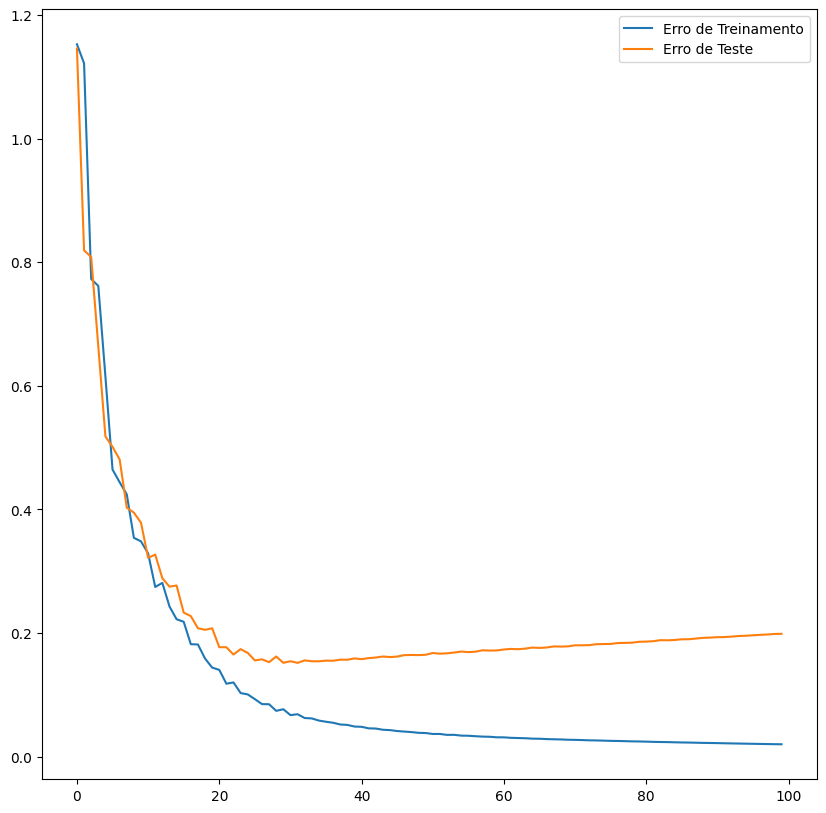

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(test_losses, label='Erro de Teste')
plt.legend()
plt.show()

In [15]:
# Teste próprio

import operator
data_testp = torch.FloatTensor(data_test[0])
label_testp = torch.LongTensor(labels_test[0])
output = classificadorMonstro(data_testp)

logits = torch.nn.functional.softmax(output, dim=-1) * 100
categories = ['Setosa','Versicolor', 'Virginica']
prob_dict = {}



for i, classname in enumerate(categories):
  prob = logits[i]
  prob_dict[classname] = [prob]

result = max(prob_dict.items(), key=operator.itemgetter(1))
print(f'Resultado Calculado : {result[0]}')
print(f'Resultado Esperado : {categories[label_testp]}')



Resultado Calculado : Virginica
Resultado Esperado : Virginica
